In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
# import all data

neural_resp1 = pd.read_csv('data/NeuralResponses_S1.txt')
neural_resp2 = pd.read_csv('data/NeuralResponses_S2.txt')
cat_labels = pd.read_csv('data/CategoryLabels.txt')
cat_vecs = pd.read_csv('data/CategoryVectors.txt')

## Section 1
Load ‘NeuralResponses_S1’ in your software (R / Python). Use the category variable (CategoryVectors + CategoryLabels) to separate neural data in response to images in which an animate objects and in which an inanimate object was shown. Now average the data over all voxels. This should leave you with 44 average voxel values for animate and 44 average voxel values for inanimate objects.

You are now able to answer Blackboard question 1A.

In [3]:
# read in data as DF and reset the indices
# separate data based on their animation state
anim_indices = cat_vecs.index[cat_vecs['Var2'] == 0].tolist()
df_anim = neural_resp1[neural_resp1.index.isin(anim_indices)].reset_index(drop=True)

inanim_indices = cat_vecs.index[cat_vecs['Var2'] == 1].tolist()
df_inanim = neural_resp1[neural_resp1.index.isin(inanim_indices)].reset_index(drop=True)

In [4]:
# average over all voxels
avg_anim = df_anim.mean(axis=1)
avg_inanim = df_inanim.mean(axis=1)

In [5]:
# this should leave you with 44 average voxel each
len(avg_anim) == 44 & len(avg_inanim) == 44

True

## Blackboard 1A
Plot the average voxel response for animate and inanimate images using a bar plot. Add error bars to indicate the standard error of the mean (“sem”, different from standard deviation). Your plot should look similar in style to Figure 1A (but the exact values differ slightly). Include your figure in your answer document.

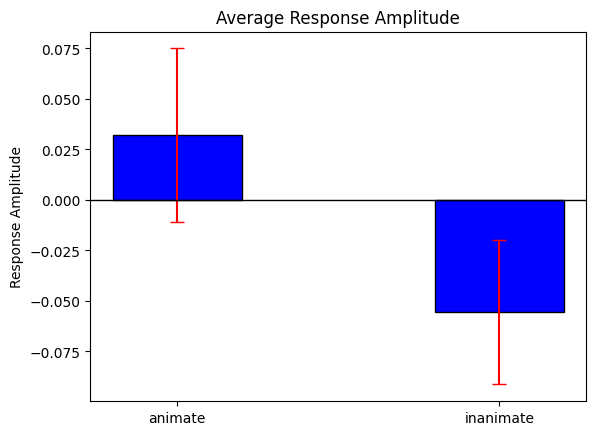

In [6]:
from scipy.stats import sem

mean_anim = np.mean(avg_anim)
mean_inanim = np.mean(avg_inanim)

positions = [0, 1]

# creating the bar plot
plt.bar(['animate', 'inanimate'], [mean_anim, mean_inanim], color ='blue', width = 0.4, edgecolor='black')
plt.errorbar(['animate', 'inanimate'], [mean_anim, mean_inanim], yerr=[sem(avg_anim), sem(avg_inanim)], fmt='none', color="red", capsize=5)

# Draw a horizontal line at y=0
plt.axhline(y=0, color='black', linewidth=1)

# set plot labels and title
plt.ylabel("Response Amplitude")
plt.title("Average Response Amplitude")
plt.savefig("1A_Average Response Amplitude.jpg")
plt.show()

Engineering: make your own t-test function Implement code to conduct a paired t-test (i.e., write a function for this), to check if the average response amplitude is different between animate and inanimate images. To do this, you only need to turn the following formula into code:
$t = \frac{m}{s/√ 𝑁}$
M and s are the mean and the standard deviation of the difference between our measured voxels’ responses to animate and inanimate images. N is the number of observations per category. The resulting t value can be compared to the values in a t-table found here: (https://www.ttable.org/) and will tell us the corresponding p-value. For this the only thing left to do is to calculate the degrees of freedom $(df = N-1)$ required for the lookup table. You can now answer Blackboard question 1B.

Note:
The t-value tells you how different the means are relative to the variation in your data.
The p-value allows you to assess whether the observed difference is statistically significant (typically compared to a significance level like 0.05)

In [7]:
# critical t-value from table: 2.021
# t_value !> critical_t_value
# --> cannot reject null hypothesis -> not statistically significant

In [31]:
def paired_t_test(anim_img, inanim_img):
    differences = np.array(inanim_img) - np.array(anim_img)
    m = np.mean(differences)
    s = np.std(differences)  # ddof=1 for sample standard deviation
    N = len(differences)

    t = m / (s / np.sqrt(N))

    df = N-1

    p = stats.t.sf(np.abs(t), df) * 2  # two-tailed p-value

    return t, p, df

# table 0.1

In [32]:
t_value, p_value, deg_freedom = paired_t_test(avg_inanim, avg_anim)

print(f"T-value: {t_value}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {deg_freedom}")

T-value: 1.6198437327750776
P-value: 0.11257775280392687
Degrees of freedom: 43


p-value: to help determine whether observed data is statistically significant (whether obtained results are likely to have occured by chance)
= probability of obtaining test results at least as extreme as the results actually observed in your sample, under the assumption that the null hypothesis is true
- small p-value (< 0.05) suggests that the observed data is very unlikely to occur under the null hypothesis (reject null hypothesis)
- large p-value (>= 0.05): suggests that the observed data is consistent with the null hypothesis (fail to reject null hypothesis -> the difference between the groups is not statistically significant)

# BB 1B:
Report the t-value and p-value in your answer document of the difference between animate and inanimate results. In addition, answer if there is a significant difference between animate and inanimate condition. Use the template in the answer sheet:
“t(df) = X, p = Y, this is not significant / significant.”
Where you:
o Replace df with degrees of freedom
o Insert the values of X and Y
o Remove the part that is not correct regarding significance

Engineering: analyzing individual voxels
Now, you will look at the responses of some individual voxels. Take the original data, however this time average over animate and inanimate images (respectively) instead of voxels. This should leave you with two arrays of size 100. Now subtract the average voxel responses of inanimate images from animate images (do this for each voxel separately). You can now answer Blackboard question 1C & D.

In [10]:
# average over animate and inanimate images (respectively)
avgImg_anim = df_anim.mean(axis=0)
avgImg_inanim = df_inanim.mean(axis=0)

# This should leave you with two arrays of size 100
len(avgImg_anim) == 100 & len(avgImg_inanim) == 100

True

In [11]:
# subtract the average voxel responses of inanimate images from animate images
individ_differences = avgImg_anim-avgImg_inanim

## BB 1C:
Use a bar plot to visualize the difference values of the first 20 voxels. Your
plot should look similar in style to Figure 1 B (but the exact values might
slightly differ). Include your visualization in the answer document.

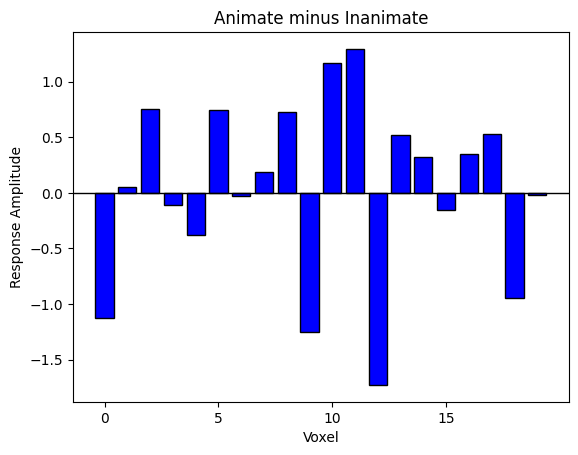

In [12]:
# creating the bar plot
plt.bar(range(0,20), individ_differences[:20], color ='blue', edgecolor='black')

plt.xticks(range(0, 20, 5))

# Draw a horizontal line at y=0
plt.axhline(y=0, color='black', linewidth=1)

plt.ylabel("Response Amplitude")
plt.xlabel("Voxel")
plt.title("Animate minus Inanimate")
plt.savefig("1C_Animate minus Inanimate.jpg")
plt.show()

## BB 1D:
Why do some of the voxels show a positive and some a negative value? What does this tell us about the difference between conditions on the level of the group average versus the difference between conditions in single voxel responses? Explain your reasoning in 3-5 sentences.

# Exercise 2

In [13]:
anim_indices2 = cat_vecs.index[cat_vecs['Var2'] == 0].tolist()
df_anim2 = neural_resp2[neural_resp2.index.isin(anim_indices)].reset_index(drop=True)

inanim_indices2 = cat_vecs.index[cat_vecs['Var2'] == 1].tolist()
df_inanim2 = neural_resp2[neural_resp2.index.isin(inanim_indices)].reset_index(drop=True)


df_train = pd.concat([df_anim2[:22], df_inanim2[:22]])
train_labels = [1]*22 +  [-1]*22


df_test = pd.concat([df_anim2[22:], df_inanim2[22:]])
test_labels = [1]*22 +  [-1]*22


## BB 2A:
Calculate and report the accuracy of your SVM in %.

In [14]:
clf = svm.SVC(kernel='linear')
clf.fit(df_train, train_labels)
prediction = clf.predict(df_test)
print(accuracy_score(prediction, test_labels))

0.6590909090909091


In [15]:
# Exercise 2b
coefficients = clf.coef_[0,:20]

## BB 2B:
Include a picture of your scatter plot. Remember to only use the first 20 values of each array.

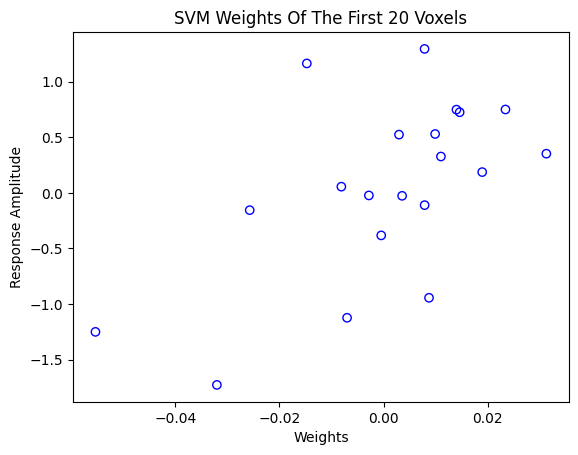

In [16]:
# creating the bar plot
plt.scatter(coefficients, individ_differences[:20], color ='blue', marker='o', facecolors='none', edgecolors='blue')

plt.ylabel("Response Amplitude")
plt.xlabel("Weights")
plt.title("SVM Weights Of The First 20 Voxels")
plt.savefig("2B_Scatter Plot.jpg")
plt.show()

## BB 2C:
Report the pearson correlation coefficient that you calculated

In [17]:
# pearson correlation
print(np.corrcoef(coefficients, individ_differences[:20]))

# perfectly positive, medium correlation

[[1.         0.58957011]
 [0.58957011 1.        ]]


Now you will perform the same analysis, but this time, you classify human and non- human images from the animate image set. Again, split both classes into training set and test set (first 10 images: training set, last 10 images: test set). There are 4 more human than non-human images in your dataset. We do not want to include these extra images because this can bias our SVM to predict a human image more often. Therefore, you need to remove the last 4 datasets from the human dataset.

In [18]:
human_indices = cat_vecs.index[((cat_vecs['Var1'] == 1) & (cat_vecs['Var3'] == 1))].tolist()
nonhuman_indices = cat_vecs.index[(cat_vecs['Var1'] == 1) & (cat_vecs['Var4'] == 1)].tolist()

human = neural_resp2[neural_resp2.index.isin(human_indices)][:20].reset_index(drop=True)
nonhuman = neural_resp2[neural_resp2.index.isin(nonhuman_indices)].reset_index(drop=True)

In [19]:
anim_nonHuman_train = pd.concat([human[:10], nonhuman[:10]])
anim_nonHuman_train_labels = [1]*10 +  [-1]*10

anim_nonHuman_test = pd.concat([human[10:], nonhuman[10:]])
anim_nonHuman_test_labels = [1]*10 +  [-1]*10

# BB 2D
Provide:
1) The calculated decoding accuracy
2) A judgement of whether this gives confidence / support that the SVM learned to differentiate between the two categories of trials
3) A brief motivation for your judgement

In [20]:
clf = svm.SVC(kernel='linear')
clf.fit(anim_nonHuman_train, anim_nonHuman_train_labels)
prediction = clf.predict(anim_nonHuman_test)

svm_accuracies = accuracy_score(prediction, anim_nonHuman_test_labels)
print(svm_accuracies)

0.55


# Exercise 3

In [21]:
import numpy as np

neural_responses = np.loadtxt(r'data/NeuralResponses_S1.txt', delimiter=',', skiprows=1)
category_vectors = np.loadtxt(r'data/CategoryVectors.txt', delimiter=',', skiprows=1)


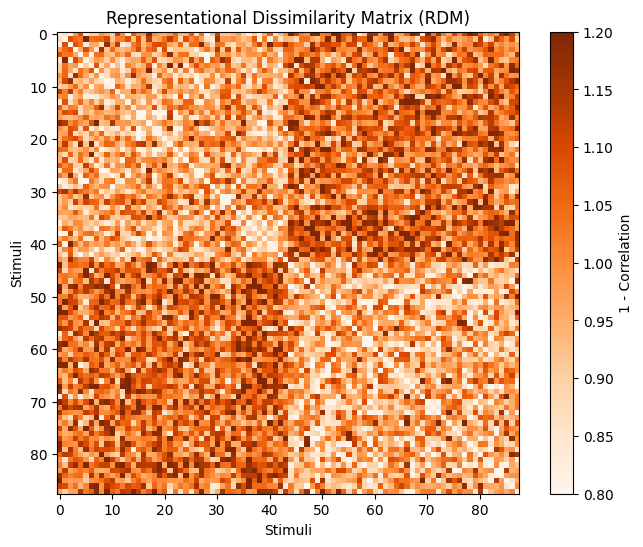

In [22]:
import matplotlib.pyplot as plt

n_stimuli = neural_responses.shape[0]
rdm = np.zeros((n_stimuli, n_stimuli))

for i in range(n_stimuli):
    for j in range(n_stimuli):
        r = np.corrcoef(neural_responses[i], neural_responses[j])[0, 1]
        rdm[i, j] = 1 - r

plt.figure(figsize=(8, 6))
# scale adjusted for 0.8-1.2
plt.imshow(rdm, cmap='Oranges',  vmin=0.8, vmax=1.2)  # interpolation='nearest',  # TODO why interpolation = nearest?
plt.colorbar(label='1 - Correlation')
plt.title('Representational Dissimilarity Matrix (RDM)')
plt.xlabel('Stimuli')
plt.ylabel('Stimuli')
plt.savefig("3A_rdm_plot")
plt.show()

In [23]:
from scipy.stats import ttest_ind

animacy_labels = category_vectors[:, 0]

same_animacy = []
different_animacy = []

# only consider each object paring once
for i in range(n_stimuli):
    for j in range(i + 1, n_stimuli):
        if animacy_labels[i] == animacy_labels[j]:
            same_animacy.append(rdm[i, j])
        else:
            different_animacy.append(rdm[i, j])

t_stat, p_value = ttest_ind(same_animacy, different_animacy)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -31.116982942314305, P-value: 1.0642378190194775e-189


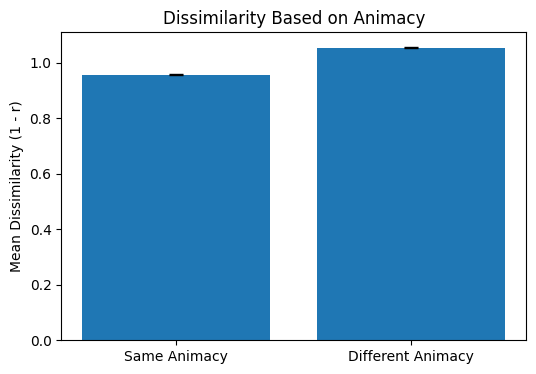

In [26]:
import numpy as np
import matplotlib.pyplot as plt

same_mean = np.mean(same_animacy)
diff_mean = np.mean(different_animacy)
same_sem = np.std(same_animacy) / np.sqrt(len(same_animacy))
diff_sem = np.std(different_animacy) / np.sqrt(len(different_animacy))

plt.figure(figsize=(6, 4))
plt.bar(['Same Animacy', 'Different Animacy'], [same_mean, diff_mean],
        yerr=[same_sem, diff_sem], capsize=5)
plt.ylabel('Mean Dissimilarity (1 - r)')
plt.title('Dissimilarity Based on Animacy')
plt.savefig("3B_dissimilarity_barplot")
plt.show()

In [127]:
import numpy as np

behavioral_rdm = np.genfromtxt(r'data/BehaviourRDM.csv', delimiter=',', skip_header=1)

if behavioral_rdm.shape != rdm.shape:
    min_rows = min(rdm.shape[0], behavioral_rdm.shape[0])
    min_cols = min(rdm.shape[1], behavioral_rdm.shape[1])
    rdm = rdm[:min_rows, :min_cols]
    behavioral_rdm = behavioral_rdm[:min_rows, :min_cols]

rdm_flat = rdm.flatten()
behavioral_rdm_flat = behavioral_rdm.flatten()

full_corr = np.corrcoef(rdm_flat, behavioral_rdm_flat)[0, 1]

animate_indices = np.where(animacy_labels == 1)[0]
inanimate_indices = np.where(animacy_labels == 0)[0]

animate_rdm = rdm[np.ix_(animate_indices, animate_indices)]
animate_behav_rdm = behavioral_rdm[np.ix_(animate_indices, animate_indices)]
animate_corr = np.corrcoef(animate_rdm.flatten(), animate_behav_rdm.flatten())[0, 1]

inanimate_rdm = rdm[np.ix_(inanimate_indices, inanimate_indices)]
inanimate_behav_rdm = behavioral_rdm[np.ix_(inanimate_indices, inanimate_indices)]
inanimate_corr = np.corrcoef(inanimate_rdm.flatten(), inanimate_behav_rdm.flatten())[0, 1]

print(f"Full correlation: {full_corr}")
print(f"Animate correlation: {animate_corr}")
print(f"Inanimate correlation: {inanimate_corr}")

Full correlation: 0.03482953214377097
Animate correlation: 0.008909273486116646
Inanimate correlation: 0.06918168363285143


# Exercise 4

TODO: Do we use all human samples? bias?

TODO: Should this be only animated data?


In [111]:
# TODO delete
def leave_one_out_cv_old(X, y):
    predictions=[]
    true_labels=[]

    for i in range(len(y)):
        # select all but the ith element to be in the train set
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i, axis=0)

        # let the ith element be the training sample
        X_test = X.iloc[i].values.reshape(1, -1)

        # store true label
        true_labels.append(y[i])

        # perform SVM prediction
        clf = svm.SVC(kernel='linear')
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)

        # store values
        predictions.append(pred)

    # Calculate overall accuracy
    acc = accuracy_score(true_labels, predictions)  # TODO whats the average decoding accuracy?
    return acc

In [79]:
def leave_one_out_cv(X, y):
    accuracies=[]

    for i in range(len(y)):
        # select all but the ith element to be in the train set
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i, axis=0)

        # let the ith element be the training sample
        X_test = X.iloc[i].values.reshape(1, -1)

        # perform SVM prediction
        clf = svm.SVC(kernel='linear')
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)

        # store values
        accuracies.append(1 if pred == y[i] else 0)

    return accuracies

In [80]:
# data set and labels containing non-human and human data
loocv_data = pd.concat([human, nonhuman])
loocv_labels = np.array([1]*20 +  [-1]*20)

accuracy = leave_one_out_cv(loocv_data, loocv_labels)
print(accuracy)

[0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1]


In [64]:
from scipy import stats
# TODO check if we can use this

# perform paried t-test on SVM data vs SVM loocv data
# TODO
print(svm_accuracies)
t_value, p_value, deg_freedom = paired_t_test(svm_accuracies, accuracy)

print(f"T-value: {t_value}")
print(f"P-value: {p_value}")
#print(f"Degrees of freedom: {deg_freedom}")

0.55
T-value: nan
P-value: nan


/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.2/CogModelling/CognitiveModelling/Interpreter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/lena/Library/CloudStorage/OneDrive-Personal/03_Uni/UU/Period 1.2/CogModelling/CognitiveModelling/Interpreter/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [81]:

# Calculate mean and standard deviation of the accuracies
mean_accuracy = np.mean(accuracy)
std_accuracy = np.std(accuracy)

# Perform t-test
t_statistic, p_value = stats.ttest_1samp(accuracy, 0.5)

# Output the results
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Standard Deviation: {std_accuracy}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The classifier performs significantly better than random chance.")
else:
    print("The classifier does not perform significantly better than random chance.")


Mean Accuracy: 0.525
Standard Deviation: 0.4993746088859545
T-statistic: 0.31264094565852346
P-value: 0.756219148968081
The classifier does not perform significantly better than random chance.


# Bonus
C


In [28]:
neural_responses = pd.read_csv(r'data/NeuralResponses_S1.txt', delimiter=',', skiprows=1)
neural_responses2 = pd.read_csv(r'data/NeuralResponses_S2.txt', delimiter=',', skiprows=1)

neural_responses_anim = neural_responses[neural_responses.index.isin(anim_indices)].reset_index(drop=True)
neural_responses2_anim = neural_responses2[neural_responses2.index.isin(anim_indices)].reset_index(drop=True)


n_stimuli = neural_responses2.shape[0]
rdm1 = np.zeros((len(neural_responses_anim), len(neural_responses_anim)))
rdm2 = np.zeros((len(neural_responses_anim), len(neural_responses_anim)))


for i in range(len(neural_responses_anim)):
    for j in range(len(neural_responses_anim)):
        # rdm for response 1
        rdm1[i, j] = 1 - np.corrcoef(neural_responses_anim.iloc[i], neural_responses_anim.iloc[j])[0, 1]

        # rdm for response 2
        rdm2[i, j] = 1 - np.corrcoef(neural_responses2_anim.iloc[i], neural_responses2_anim.iloc[j])[0, 1]

"""
plt.figure(figsize=(8, 6))
# scale adjusted for 0.8-1.2
plt.imshow(rdm1, cmap='Oranges',  vmin=0.8, vmax=1.2)  # interpolation='nearest',  # TODO why interpolation = nearest?
plt.colorbar(label='1 - Correlation')
plt.title('Representational Dissimilarity Matrix (RDM)')
plt.xlabel('Stimuli')
plt.ylabel('Stimuli')
plt.savefig("3A_rdm_plot3")
plt.show()

"""

'\nplt.figure(figsize=(8, 6))\n# scale adjusted for 0.8-1.2\nplt.imshow(rdm1, cmap=\'Oranges\',  vmin=0.8, vmax=1.2)  # interpolation=\'nearest\',  # TODO why interpolation = nearest?\nplt.colorbar(label=\'1 - Correlation\')\nplt.title(\'Representational Dissimilarity Matrix (RDM)\')\nplt.xlabel(\'Stimuli\')\nplt.ylabel(\'Stimuli\')\nplt.savefig("3A_rdm_plot3")\nplt.show()\n\n'

In [29]:
resp1_flat = []
resp2_flat = []

# only consider each object paring once
for i in range(len(neural_responses_anim)):
    for j in range(i + 1, len(neural_responses_anim)):
        resp1_flat.append(rdm1[i, j])
        resp2_flat.append(rdm2[i, j])

t_stat, p_value = ttest_ind(resp1_flat, resp2_flat)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: -4.057249695122501, P-value: 5.167442217933413e-05


In [30]:
# Calculate mean and standard deviation of the accuracies
mean_resp1 = np.mean(resp1_flat)
mean_resp2 = np.mean(resp2_flat)

print(mean_resp1)
print(mean_resp2)

0.966068023749496
0.9842729416832916
